In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analysis_data_filepath = "/project/pi_cberger_smith_edu/nlsigma_data/"
source_data_filepath = "/work/pi_cberger_smith_edu/data_test/"
analyzer = LatticeData(datadir = analysis_data_filepath, use_full_filepath = True)

## Copy data from source directory to analysis directory

In [3]:
analyzer.copy_data_from_directory(source_data_filepath)

# Systematics plots

In [4]:
df = analyzer.get_data()
sns.set_palette("magma", n_colors=len(df["length"].unique()))

In [5]:
itheta = 0.5*np.pi
beta = 1.6
length = 10
nMC = 10000
ntherm = 0
plot_params = {"beta": beta, "nMC": nMC}#,"itheta": itheta, "length": length, "ntherm": ntherm}
df_systematics = analyzer.get_data(**plot_params)

In [6]:
df_systematics.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,-0.241449,-74.913914,-74.913914,-0.061059,-0.007951,0.00857,0.520000,6.0,...,1,12,12,1,0.482442,3.639752,0.011449,0.003089,0.035788,-0.270000
1,10,100.0,0.845060,-162.925111,-162.925111,-0.042390,-0.007951,0.00857,0.379091,39.0,...,1,12,12,1,0.401977,3.032694,0.011449,0.003089,0.042952,-0.324047
2,20,100.0,0.348876,-179.706324,-179.706324,-0.033568,-0.007951,0.00857,0.321905,39.0,...,1,12,12,1,0.357711,2.698731,0.011449,0.003089,0.048267,-0.364147
3,30,100.0,-0.305995,-198.634261,-198.634261,-0.023846,-0.007951,0.00857,0.296129,39.0,...,1,12,12,1,0.301493,2.274598,0.011449,0.003089,0.057267,-0.432047
4,40,100.0,0.440652,-185.919984,-185.919984,-0.011896,-0.007951,0.00857,0.283902,39.0,...,1,12,12,1,0.212946,1.606562,0.011449,0.003089,0.081080,-0.611700


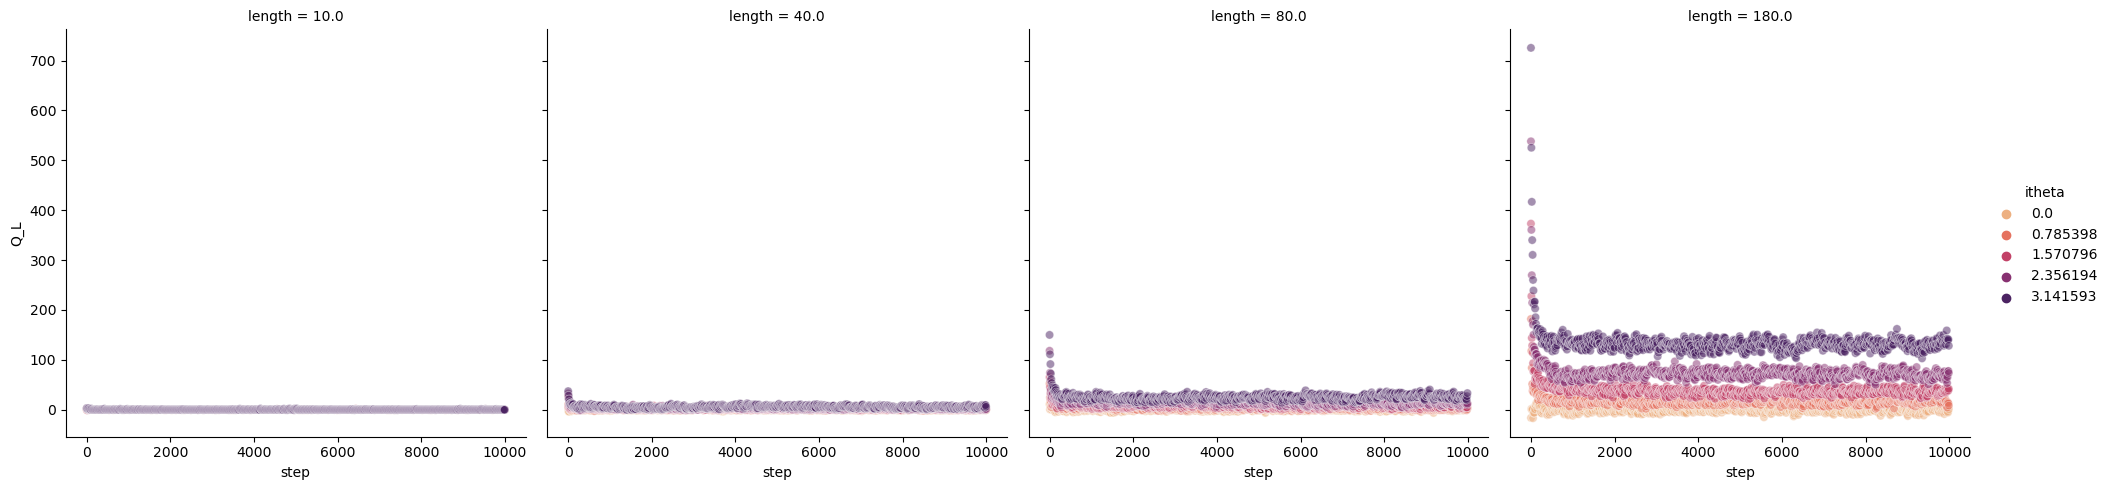

In [7]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "itheta",col = "length",
            alpha = 0.5,palette = "flare" )
plt.show()

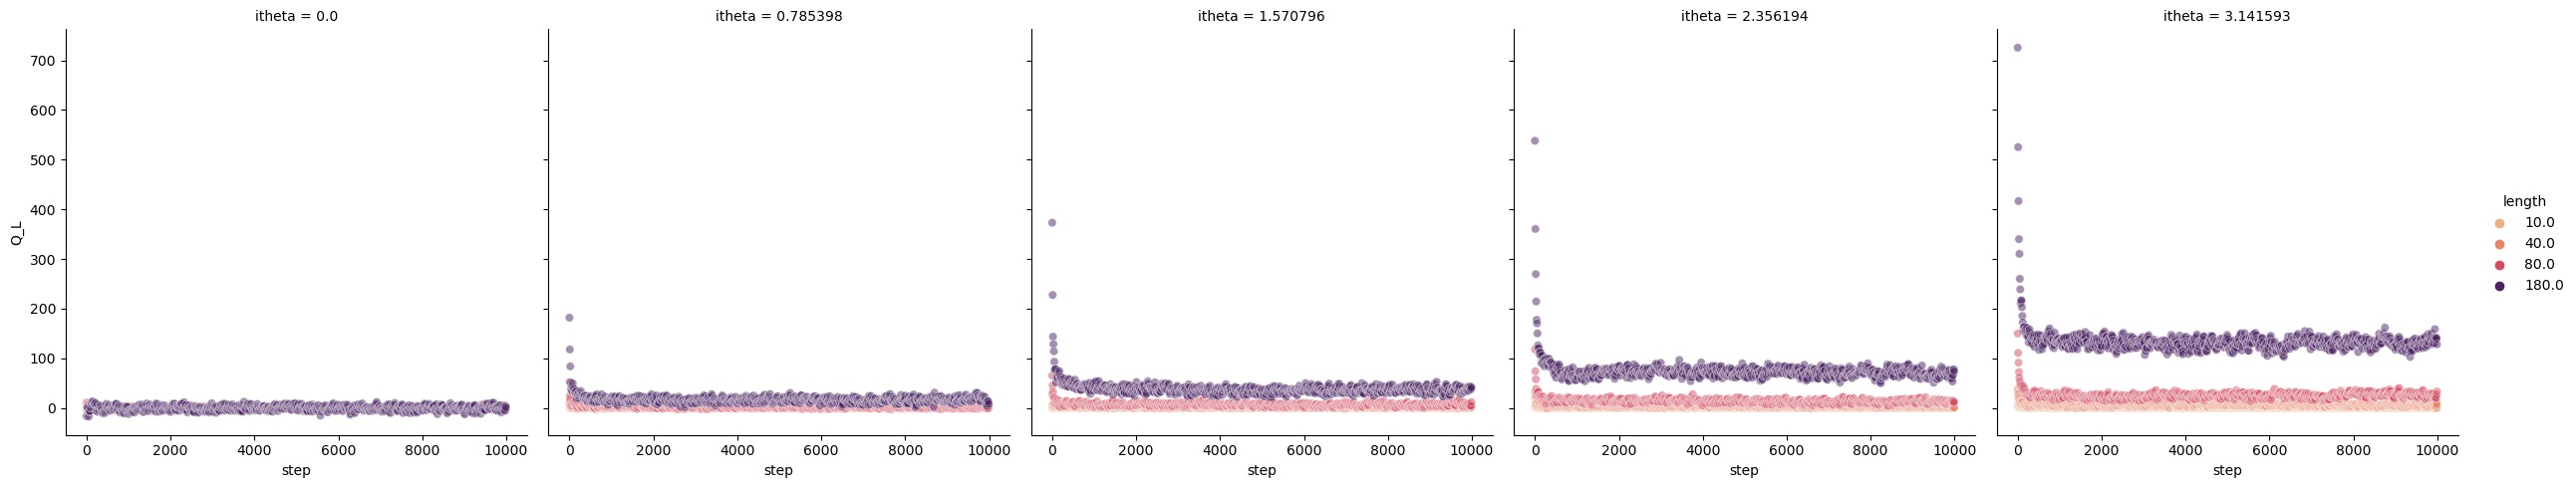

In [8]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "length",col = "itheta",
            alpha = 0.5,palette = "flare" )
plt.show()

In [9]:
itheta = 0.5*np.pi
beta = 1.6
length = 10
nMC = 10000
ntherm = 0
freq = 10
acf_params = {"beta": beta, "nMC": nMC,"itheta": itheta, "length": length, "ntherm": ntherm, "freq": freq}

In [10]:
run = analyzer.get_data(single_run = True,suppress_output = False,**acf_params)

freq 10
nMC 10000
ntherm 0
itheta 1.570796
beta 1.6
length 10


In [11]:
run.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,0.963355,-77.199210,-78.712444,-0.066802,-0.004507,0.014223,0.470000,5.0,...,1,7,7,1,0.298768,2.087045,0.037765,0.011039,0.067214,-0.469524
1,10,100.0,-1.000000,-180.944628,-179.373832,-0.089108,-0.004507,0.014223,0.333636,8.0,...,1,7,7,1,0.345062,2.410435,0.037765,0.011039,0.058196,-0.406532
2,20,100.0,0.949854,-176.316751,-177.808778,-0.074313,-0.004507,0.014223,0.310952,8.0,...,1,7,7,1,0.315117,2.201250,0.037765,0.011039,0.063727,-0.445165
3,30,100.0,0.000000,-205.250772,-205.250772,-0.059356,-0.004507,0.014223,0.291290,9.0,...,1,7,7,1,0.281625,1.967294,0.037765,0.011039,0.071305,-0.498105
4,40,100.0,0.000000,-198.574789,-198.574789,-0.049839,-0.004507,0.014223,0.270488,9.0,...,1,7,7,1,0.258062,1.802693,0.037765,0.011039,0.077816,-0.543586


In [12]:
decorr = analyzer.ta(run["Q_L"])

In [13]:
run = analyzer.autocorrelation(run)

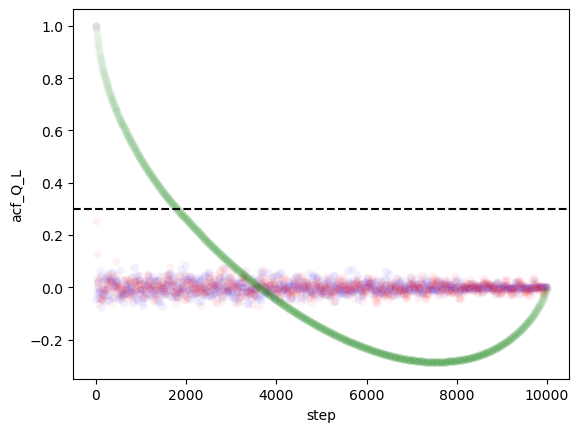

In [14]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green", alpha = 0.05)
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

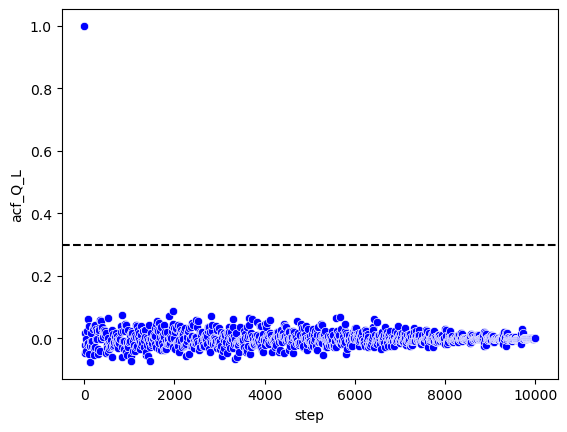

In [15]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

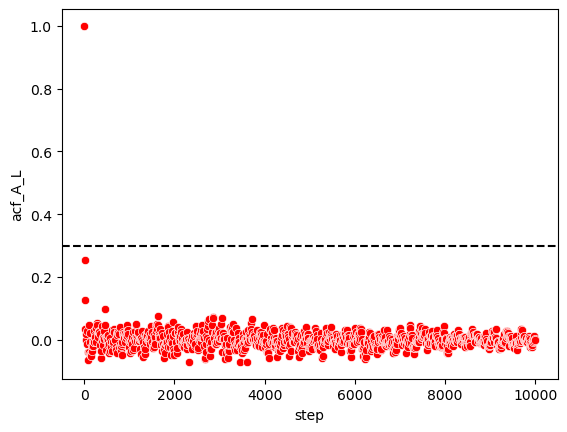

In [16]:
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

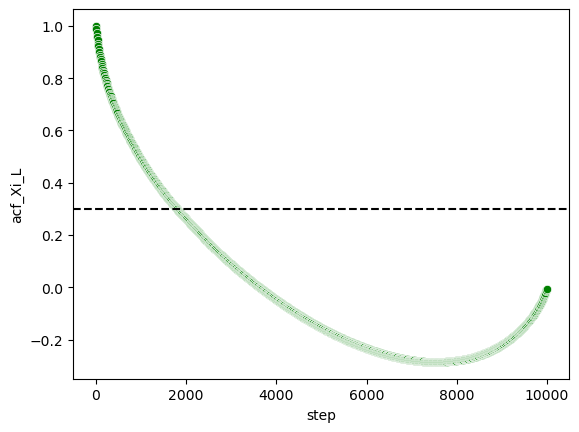

In [17]:
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

In [18]:
df_ta = analyzer.do_stats(therm = 0.0, **plot_params)
df_ta = df_ta[['Q_L_ta', 'A_L_ta', 'S_L_ta', 'Xi_L_ta']]
df_ta = df_ta.rename(columns = {'Q_L_ta':"Q_L", 'A_L_ta':"A_L", 'S_L_ta':"S_L", 'Xi_L_ta':"Xi_L"})
df_ta.columns.name = "observable"
df_ta = df_ta.stack()
df_ta.name = "ta"
df_ta = df_ta.to_frame()

In [19]:
df_ta.head()

ta
  observable      
0 Q_L          1.0
  A_L         12.0
  S_L         12.0
  Xi_L         1.0
1 Q_L          1.0

In [20]:
sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "observable", col = "length", row = "nMC",
           palette = analyzer.palette)
plt.show()

ValueError: Could not interpret value `itheta` for parameter `x`

In [ ]:
sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "length", col = "observable", row = "nMC",
           palette = analyzer.palette)
plt.show()

# Timing

Note, not all output files have timing info, so we will need to deal with nans.

In [21]:
df_dt = analyzer.get_data()

In [22]:
df_dt = df_dt.dropna(subset = ['dt'])

In [23]:
df_dt.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,-0.241449,-74.913914,-74.913914,-0.061059,-0.007951,0.00857,0.520000,6.0,...,1,12,12,1,0.482442,3.639752,0.011449,0.003089,0.035788,-0.270000
1,10,100.0,0.845060,-162.925111,-162.925111,-0.042390,-0.007951,0.00857,0.379091,39.0,...,1,12,12,1,0.401977,3.032694,0.011449,0.003089,0.042952,-0.324047
2,20,100.0,0.348876,-179.706324,-179.706324,-0.033568,-0.007951,0.00857,0.321905,39.0,...,1,12,12,1,0.357711,2.698731,0.011449,0.003089,0.048267,-0.364147
3,30,100.0,-0.305995,-198.634261,-198.634261,-0.023846,-0.007951,0.00857,0.296129,39.0,...,1,12,12,1,0.301493,2.274598,0.011449,0.003089,0.057267,-0.432047
4,40,100.0,0.440652,-185.919984,-185.919984,-0.011896,-0.007951,0.00857,0.283902,39.0,...,1,12,12,1,0.212946,1.606562,0.011449,0.003089,0.081080,-0.611700


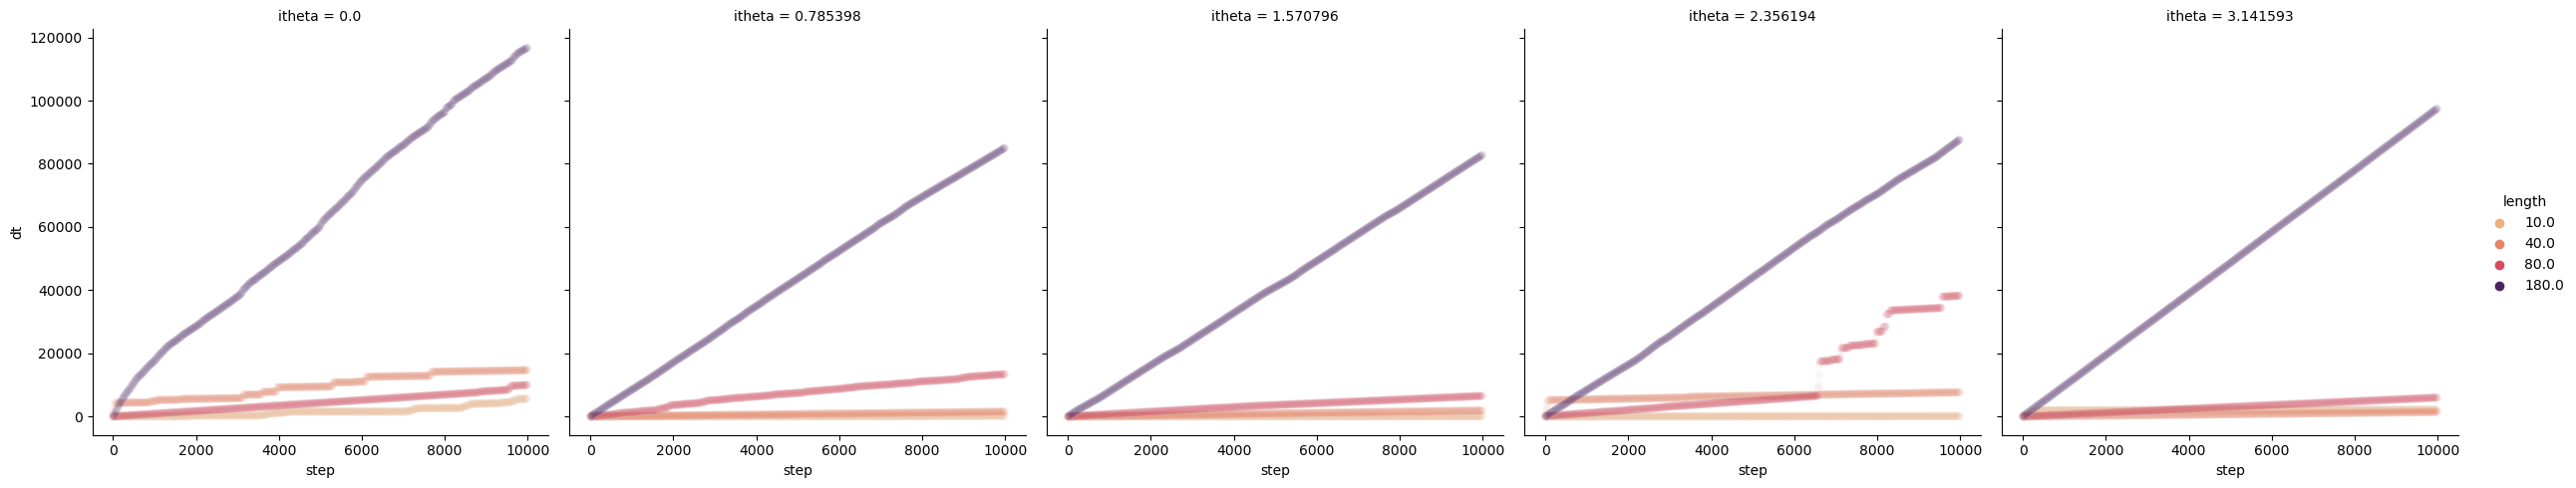

In [24]:
sns.relplot(data = df_dt, x = "step", y = "dt", hue = "length",col = "itheta",
            alpha = 0.05,palette = "flare" )
plt.show()

In [25]:
df_time = analyzer.do_stats()

In [26]:
df_time.head()

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,10.0,0.000000,1.6,10000.0,0.0,10.0,100.0,0.006261,-208.448019,-208.448019,...,0.012720,0.922399,0.276267,0.0,0.0,0.035934,0.068191,5797.0,96.616667,1.610278
1,10.0,0.785398,1.6,10000.0,0.0,10.0,100.0,0.020167,-207.719616,-207.735455,...,0.010598,0.575230,0.181456,0.0,0.0,0.076856,0.064439,217.0,3.616667,0.060278
2,10.0,1.570796,1.6,10000.0,0.0,10.0,100.0,0.041375,-207.348046,-207.413037,...,0.010029,0.568962,0.243344,0.0,0.0,0.122064,0.147006,82.0,1.366667,0.022778
3,10.0,2.356194,1.6,10000.0,0.0,10.0,100.0,0.072044,-207.090246,-207.259995,...,0.012741,0.521627,0.390897,0.0,0.0,0.149182,0.135634,113.0,1.883333,0.031389
4,10.0,3.141593,1.6,10000.0,0.0,10.0,100.0,0.175526,-205.658444,-206.209877,...,0.013827,0.453630,0.331558,0.0,0.0,0.559794,0.600301,2129.0,35.483333,0.591389


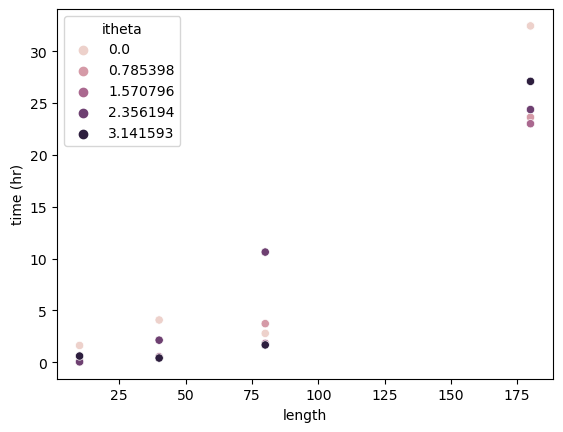

In [27]:
sns.scatterplot(data = df_time, x = "length", y = "time (hr)", hue = "itheta")
#plt.yscale('log')
plt.show()